## **Imports**

In [ ]:
# General
import numpy as np
import pandas as pd
import seaborn as sns
from time import time
import matplotlib.pyplot as plt

# Handling Data
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Models

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score

## **Data**
The dataset used is the Microbes Dataset from Kaggle found here: https://www.kaggle.com/datasets/sayansh001/microbes-dataset


There are so many duplicates, they need to be removed. Shape of the dataset will be greatly reduced. Almost all features are continuous except for the microorganism which is categorical because it has 10 values.


In [ ]:
data = pd.read_csv('microbes.csv')
print('Attributes:')
print(data.dtypes)
# print(data.head())
# print(data.describe())

# Dropping unamed columns
data.drop(['Unnamed: 0'], axis=1, inplace=True)
print('\n'f'Dataset shape: {data.shape}')

# Missing values
print('Number of missing values:', sum(data.isnull().sum()))

# Duplicate values
print(f'Duplicates in the dataset: {data.duplicated().sum()}')
print(f'Percentage of duplicates:','{:.2f}'.format(data.duplicated().sum()/len(data)*100),'%')

# Dropping duplicates
subset = data.copy()
subset = subset.drop_duplicates()
print(f'Dataset shape after dropping duplicates: {subset.shape}')

#Cardinality
# data.nunique()

Attributes:
Unnamed: 0           int64
Solidity           float64
Eccentricity       float64
EquivDiameter      float64
Extrema            float64
FilledArea         float64
Extent             float64
Orientation        float64
EulerNumber        float64
BoundingBox1       float64
BoundingBox2       float64
BoundingBox3       float64
BoundingBox4       float64
ConvexHull1        float64
ConvexHull2        float64
ConvexHull3        float64
ConvexHull4        float64
MajorAxisLength    float64
MinorAxisLength    float64
Perimeter          float64
ConvexArea         float64
Centroid1          float64
Centroid2          float64
Area               float64
raddi              float64
microorganisms      object
dtype: object

Dataset shape: (30527, 25)
Number of missing values: 0
Duplicates in the dataset: 25653
Percentage of duplicates: 84.03 %
Dataset shape after dropping duplicates: (4874, 25)


### Visualizing Data

Text(0.5, 1.0, 'Subset: Target distribution')

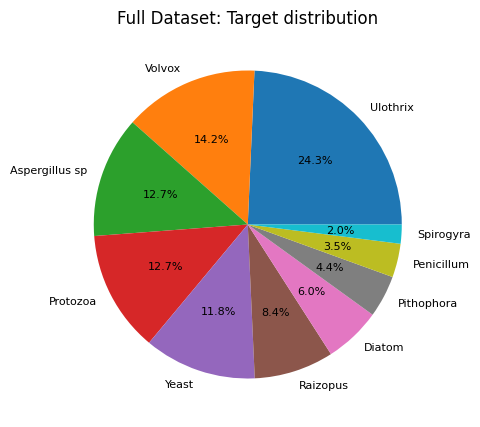

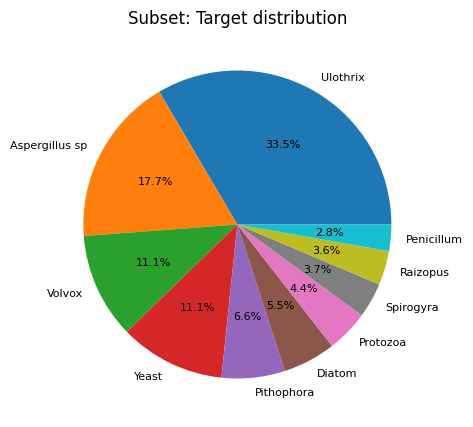

In [ ]:
# Full dataset target value percentages
plt.figure(figsize=(5,5))
data['microorganisms'].value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize':8}, ylabel='').set_title("Full Dataset: Target distribution")

# Subset target value percentages
plt.figure(figsize=(5,5))
subset['microorganisms'].value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize':8}, ylabel='').set_title("Subset: Target distribution")

[Text(0.5, 1.0, 'Subset: Correlations between features')]

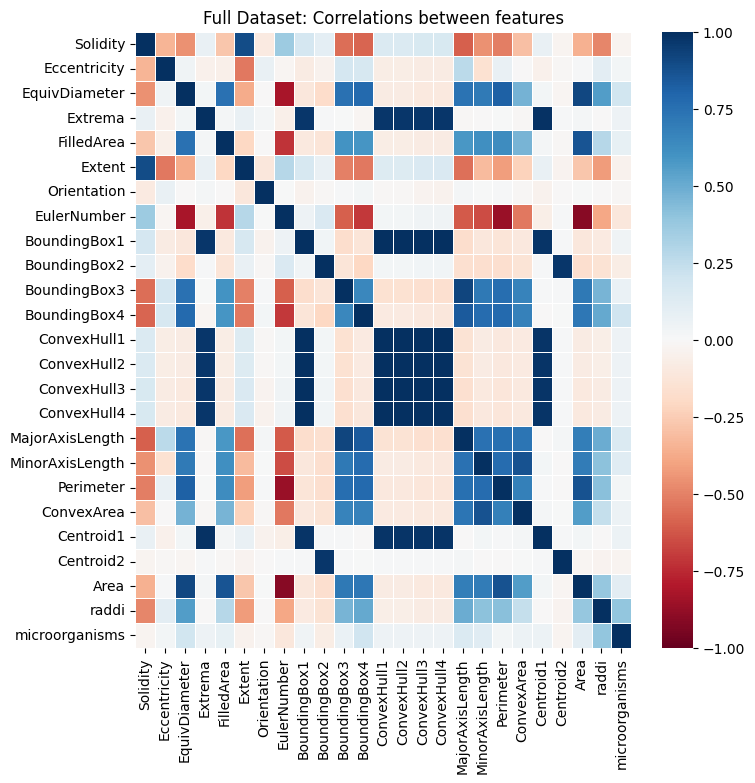

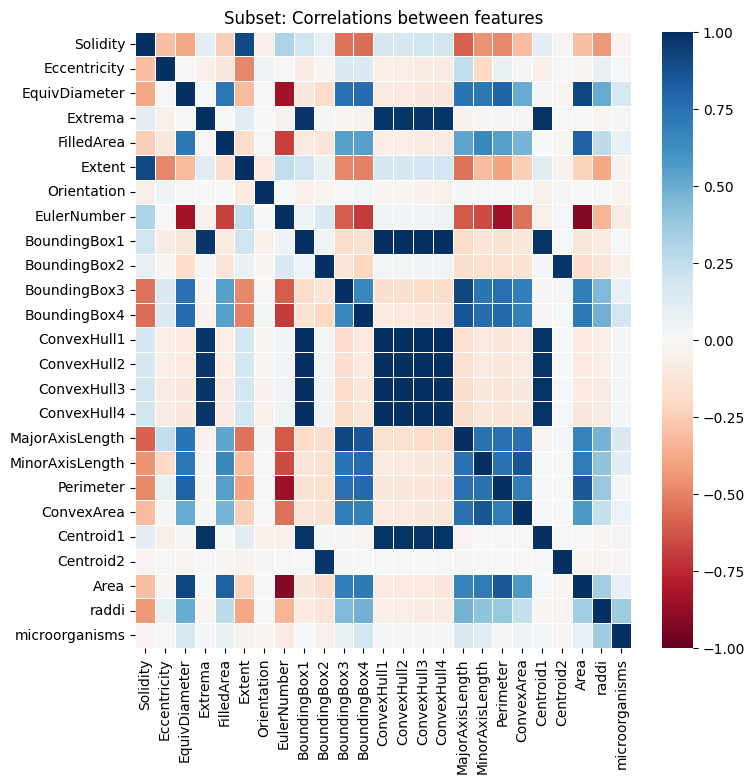

In [ ]:
# Label encoding of microorganism feature
encoder = LabelEncoder()
data['microorganisms'] = encoder.fit_transform(data['microorganisms'])
subset['microorganisms'] = encoder.fit_transform(subset['microorganisms'])

# Full Dataset Correlation Matrix
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), cmap="RdBu", linewidth=.5, vmin=-1, vmax=1, center=0).set(title='Full Dataset: Correlations between features')

# Subset Correlation Matrix
plt.figure(figsize=(8,8))
sns.heatmap(subset.corr(), cmap="RdBu", linewidth=.5, vmin=-1, vmax=1, center=0).set(title='Subset: Correlations between features')

### Handling the datasets

Preparing, balancing, and splitting datasets

In [ ]:
# Scaling
scaler = StandardScaler()

# Full dataset
xf = data.drop('microorganisms',axis='columns')
yf = data['microorganisms']
# Splitting data
xf_train, xf_test, yf_train, yf_test = train_test_split(xf, yf, test_size = 0.20, random_state = 5, stratify=yf)
# Scaling
xf_train = scaler.fit_transform(xf_train)
xf_test = scaler.transform(xf_test)


# Subset dataset
xs = subset.drop('microorganisms',axis='columns')
ys = subset['microorganisms']
# Balancing target value instances
smote = SMOTE()
xs_sm, ys_sm = smote.fit_resample(xs,ys)
# Splitting data
xs_train, xs_test, ys_train, ys_test = train_test_split(xs_sm, ys_sm, test_size = 0.20, random_state = 5, stratify=ys_sm)
# Scaling
xs_train = scaler.transform(xs_train)
xs_test = scaler.transform(xs_test)

## **Models**

Need to repeat each 5 to 10 times and average both accuracies and times

### K-Nearest Neighbor

In [ ]:
neighbors = np.arange(3,33,3)
ave_num = 10

# Testing number of neighbors
# Full Dataset
f_accuracy = np.zeros_like(neighbors, dtype=float)
f_times = np.zeros_like(neighbors, dtype=float)
print("Full Dataset")
for i in range(ave_num):
  for n in range(len(neighbors)):
    tic = time()
    knn = KNeighborsClassifier(n_neighbors=neighbors[n],
                              weights='uniform')
    knn.fit(xf_train, yf_train)
    yf_pred = knn.predict(xf_test)
    toc = time() - tic
    f_times[n] = f_times[n] + toc
    accuracy = accuracy_score(yf_test, yf_pred)
    f_accuracy[n] = f_accuracy[n] + accuracy
    # print("neighbors:", neighbors[n], ", Accuracy:", '{:.3f}'.format(accuracy), "time:", '{:.3f}'.format(toc))
for n in range(len(neighbors)):
  f_times[n] = f_times[n]/ave_num
  f_accuracy[n] = f_accuracy[n]/ave_num
  # print("neighbors:", neighbors[n], ", Accuracy:", '{:.3f}'.format(f_accuracy[n]), "time:", '{:.3f}'.format(f_times[n]))


# Subset Dataset
s_accuracy = np.zeros_like(neighbors, dtype=float)
s_times = np.zeros_like(neighbors, dtype=float)
print("\n\nSubset")
for i in range(ave_num):
  for n in range(len(neighbors)):
    tic = time()
    knn = KNeighborsClassifier(n_neighbors=neighbors[n],
                              weights='uniform')
    knn.fit(xs_train, ys_train)
    ys_pred = knn.predict(xs_test)
    toc = time() - tic
    s_times[n] = s_times[n] + toc
    accuracy = accuracy_score(ys_test, ys_pred)
    s_accuracy[n] = s_accuracy[n] + accuracy
    # print("neighbors:", neighbors[n], ", Accuracy:", '{:.3f}'.format(accuracy), "time:", '{:.3f}'.format(toc))
for n in range(len(neighbors)):
  s_times[n] = s_times[n]/ave_num
  s_accuracy[n] = s_accuracy[n]/ave_num
  # print("neighbors:", neighbors[n], ", Accuracy:", '{:.3f}'.format(s_accuracy[n]), "time:", '{:.3f}'.format(s_times[n]))

# Testing weights parameter
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn.fit(xs_train, ys_train)
ys_pred = knn.predict(xs_test)
accuracy = accuracy_score(ys_test, ys_pred)
print("\nweight: distance, Accuracy:", '{:.3f}'.format(accuracy))

knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(xs_train, ys_train)
ys_pred = knn.predict(xs_test)
accuracy = accuracy_score(ys_test, ys_pred)
print("weight: distance, Accuracy:", '{:.3f}'.format(accuracy))

Full Dataset


Subset

weight: distance, Accuracy: 0.872
weight: distance, Accuracy: 0.903


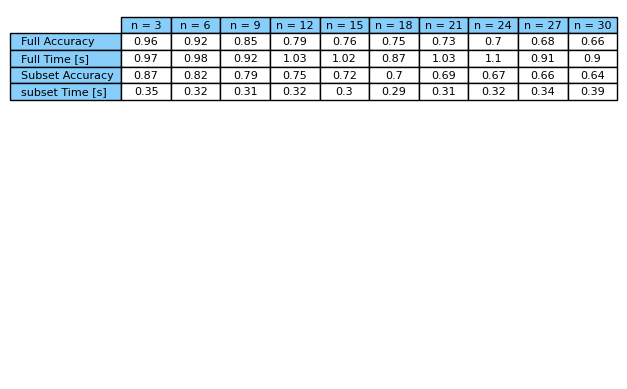

In [ ]:
cell_data  = [np.round(f_accuracy,2), np.round(f_times,2), np.round(s_accuracy,2), np.round(s_times,2)]
row_labels = [ 'n = 3',  'n = 6',  'n = 9', 'n = 12', 'n = 15',
              'n = 18', 'n = 21', 'n = 24', 'n = 27', 'n = 30',]
col_labels = ['Full Accuracy', 'Full Time [s]', 'Subset Accuracy', 'subset Time [s]']

fig, ax = plt.subplots()
ax.set_axis_off()
table = ax.table(
    cellText = cell_data,
    rowLabels = col_labels,
    colLabels = row_labels,
    rowColours =["lightskyblue"] * 10,
    colColours =["lightskyblue"] * 10,
    cellLoc ='center',
    loc ='upper left')

### Multi-Linear Perceptron

In [ ]:
# Time check for a single MLP
tic = time()
clf = MLPClassifier(hidden_layer_sizes=500,
                    random_state=1,
                    max_iter=1000)
clf.fit(xf_train, yf_train)
yf_pred = clf.predict(xf_test)
toc = time() - tic
accuracy = accuracy_score(yf_test, yf_pred)
print("l:", 500, ", Accuracy:", '{:.3f}'.format(accuracy), "time:", '{:.3f}'.format(toc))

l: 500 , Accuracy: 0.978 time: 255.855


A single run with 500 hidden layers resulted in a runtime of 256 second (4 minutes and 26 seconds) and an accuracy of 97.8%

In [ ]:
layers = np.arange(10, 60, 10)
ave_num = 5

# Full Dataset
f_accuracy = np.zeros_like(layers, dtype=float)
f_times = np.zeros_like(layers, dtype=float)
print("Full Dataset")
for i in range(ave_num):
  for l in range(len(layers)):
    tic = time()
    clf = MLPClassifier(hidden_layer_sizes=layers[l],
                        random_state=1,
                        max_iter=1000)
    clf.fit(xf_train, yf_train)
    yf_pred = clf.predict(xf_test)
    toc = time() - tic
    f_times[l] = f_times[l] + toc
    accuracy = accuracy_score(yf_test, yf_pred)
    f_accuracy[l] = f_accuracy[l] + accuracy
    # print("l:", l, ", Accuracy:", '{:.3f}'.format(accuracy), "time:", '{:.3f}'.format(toc))
for l in range(len(layers)):
  f_times[l] = f_times[l]/ave_num
  f_accuracy[l] = f_accuracy[l]/ave_num
  # print("neighbors:", neighbors[n], ", Accuracy:", '{:.3f}'.format(f_accuracy[n]), "time:", '{:.3f}'.format(f_times[n]))

# Subset
s_accuracy = np.zeros_like(layers, dtype=float)
s_times = np.zeros_like(layers, dtype=float)
print("\n\nSubset")
for i in range(ave_num):
  for l in range(len(layers)):
    tic = time()
    clf = MLPClassifier(hidden_layer_sizes=layers[l],
                        random_state=1,
                        max_iter=1000)
    clf.fit(xs_train, ys_train)
    ys_pred = clf.predict(xs_test)
    toc = time() - tic
    s_times[l] = s_times[l] + toc
    accuracy = accuracy_score(ys_test, ys_pred)
    s_accuracy[l] = s_accuracy[l] + accuracy
    # print("l:", l, ", Accuracy:", '{:.3f}'.format(accuracy), "time:", '{:.3f}'.format(toc))
for l in range(len(layers)):
  s_times[l] = s_times[l]/ave_num
  s_accuracy[l] = s_accuracy[l]/ave_num
  # print("neighbors:", neighbors[n], ", Accuracy:", '{:.3f}'.format(f_accuracy[n]), "time:", '{:.3f}'.format(f_times[n]))

Full Dataset


Subset


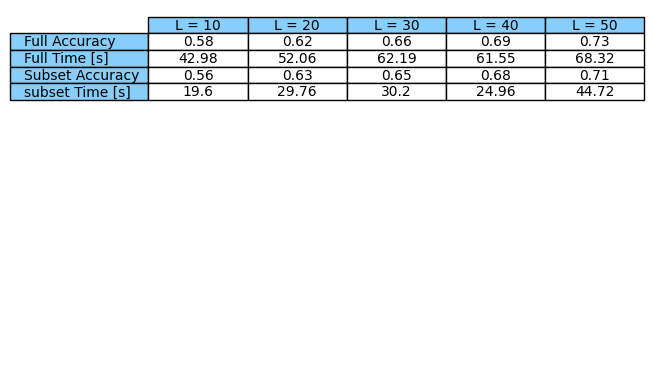

In [ ]:
cell_data  = [np.round(f_accuracy,2), np.round(f_times,2), np.round(s_accuracy,2), np.round(s_times,2)]
row_labels = [ 'L = 10',  'L = 20',  'L = 30', 'L = 40', 'L = 50']
col_labels = ['Full Accuracy', 'Full Time [s]', 'Subset Accuracy', 'subset Time [s]']

fig, ax = plt.subplots()
ax.set_axis_off()
table = ax.table(
    cellText = cell_data,
    rowLabels = col_labels,
    colLabels = row_labels,
    rowColours =["lightskyblue"] * 10,
    colColours =["lightskyblue"] * 10,
    cellLoc ='center',
    loc ='upper left')

### Gradient Boosting
Attempted with scikit-learn gradient boosting, but had mistakes in code (mistakes were fixed but took more time).  Due to time, switched to using xgboosting.

In [ ]:
estimators = np.arange(250, 1250, 250)
ave_num = 5

# Full Dataset
f_accuracy = np.zeros_like(estimators, dtype=float)
f_times = np.zeros_like(estimators, dtype=float)
print("Full Dataset")
for i in range(ave_num):
  for e in range(len(estimators)):
    print(e)
    tic = time()
    grad_boost = GradientBoostingClassifier(n_estimators=estimators[e],
                                            learning_rate=0.1,
                                            max_depth=3,
                                            random_state=0)
    grad_boost.fit(xf_train, yf_train)
    yf_pred = grad_boost.predict(xf_test)
    toc = time() - tic
    f_times[e] = f_times[e] + toc
    accuracy = accuracy_score(yf_test, yf_pred)
    f_accuracy[e] = f_accuracy[e] + accuracy
    # print("e:", e, ", Accuracy:", '{:.3f}'.format(accuracy), "time:", '{:.3f}'.format(toc))
for e in range(len(estimators)):
  f_times[e] = f_times[e]/ave_num
  f_accuracy[e] = f_accuracy[e]/ave_num

# Subset Dataset
s_accuracy = np.zeros_like(estimators, dtype=float)
s_times = np.zeros_like(estimators, dtype=float)
print("\n\nSubset")
for i in range(ave_num):
  for e in range(len(estimators)):
    print(e)
    tic = time()
    grad_boost = GradientBoostingClassifier(n_estimators=estimators[e],
                                            learning_rate=0.1,
                                            max_depth=3,
                                            random_state=0)
    grad_boost.fit(xs_train, ys_train)
    ys_pred = grad_boost.predict(xs_test)
    toc = time() - tic
    s_times[e] = s_times[e] + toc
    accuracy = accuracy_score(ys_test, ys_pred)
    s_accuracy[e] = s_accuracy[e] + accuracy
    # print("e:", e, ", Accuracy:", '{:.3f}'.format(accuracy), "time:", '{:.3f}'.format(toc))
for e in range(len(estimators)):
  s_times[e] = s_times[e]/ave_num
  s_accuracy[e] = s_accuracy[e]/ave_num

Full Dataset
0
1
2
3


Subset
0
1
2
3


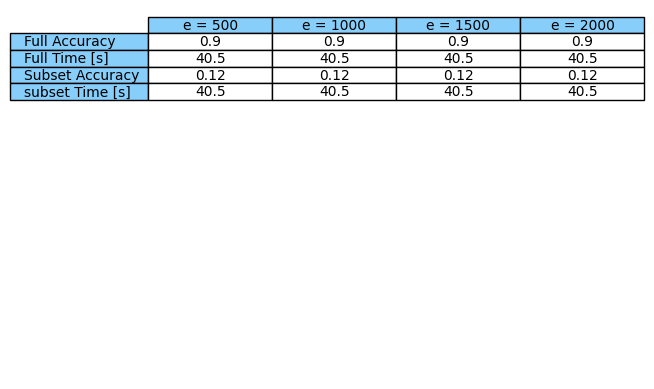

In [ ]:
cell_data  = [np.round(f_accuracy,2), np.round(f_times,2), np.round(s_accuracy,2), np.round(s_times,2)]
row_labels = [ 'e = 500',  'e = 1000',  'e = 1500', 'e = 2000', 'e = 2500', 'e = 3000']
col_labels = ['Full Accuracy', 'Full Time [s]', 'Subset Accuracy', 'subset Time [s]']

fig, ax = plt.subplots()
ax.set_axis_off()
table = ax.table(
    cellText = cell_data,
    rowLabels = col_labels,
    colLabels = row_labels,
    rowColours =["lightskyblue"] * 10,
    colColours =["lightskyblue"] * 10,
    cellLoc ='center',
    loc ='upper left')

**XGBoosting**

In [ ]:
# Full Dataset
print("Full Dataset")
tic = time()
model = xgb.XGBClassifier(
    max_depth=3,
    n_estimators=1000,
    learning_rate=0.1,
    objective='multi:softmax',
    num_class=10,
    random_state=42
)
model.fit(xf_train, yf_train)
yf_pred = model.predict(xf_test)
toc = time() - tic
accuracy = accuracy_score(yf_test, yf_pred)
print("e:", 1000, ", Accuracy:", '{:.3f}'.format(accuracy), "time:", '{:.3f}'.format(toc))

# Subset Dataset
print("subset Dataset")
tic = time()
model = xgb.XGBClassifier(
    max_depth=3,
    n_estimators=1000,
    learning_rate=0.1,
    objective='multi:softmax',
    num_class=10,
    random_state=42
)
model.fit(xs_train, ys_train)
ys_pred = model.predict(xs_test)
toc = time() - tic
accuracy = accuracy_score(ys_test, ys_pred)
print("e:", 1000, ", Accuracy:", '{:.3f}'.format(accuracy), "time:", '{:.3f}'.format(toc))

Full Dataset
e: 1000 , Accuracy: 0.985 time: 189.619
subset Dataset
e: 1000 , Accuracy: 0.855 time: 293.649
